In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

symbol = "MSFT"
df = yf.Ticker(symbol).history(period='1y').reset_index()
df.to_csv("msft_stock_data_raw.csv", index = False)
print(df.head())

                       Date        Open        High         Low       Close  \
0 2024-06-21 00:00:00-04:00  443.976055  447.151689  443.112679  446.357788   
1 2024-06-24 00:00:00-04:00  446.377654  449.305221  443.013463  444.263885   
2 2024-06-25 00:00:00-04:00  444.839422  447.985316  443.350835  447.518890   
3 2024-06-26 00:00:00-04:00  445.583705  450.148711  444.779871  448.719666   
4 2024-06-27 00:00:00-04:00  448.739503  452.699165  448.332619  449.404419   

     Volume  Dividends  Stock Splits  
0  34486200        0.0           0.0  
1  15913700        0.0           0.0  
2  16747500        0.0           0.0  
3  16507000        0.0           0.0  
4  14806300        0.0           0.0  


In [2]:
df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [3]:
print(df.dtypes)

Date      datetime64[ns, America/New_York]
Open                               float64
High                               float64
Low                                float64
Close                              float64
Volume                               int64
dtype: object


In [4]:
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
print(df.describe())

             Open        High         Low       Close        Volume
count  250.000000  250.000000  250.000000  250.000000  2.500000e+02
mean   421.033555  424.913492  417.205822  421.250196  2.159114e+07
std     25.726486   25.044411   26.446733   25.827251  8.404252e+06
min    350.237034  363.812108  344.158197  353.910278  7.164500e+06
25%    406.512584  411.130847  404.696757  407.232880  1.652510e+07
50%    419.595106  423.968076  415.159647  419.983261  1.944965e+07
75%    438.603726  441.901031  434.808474  437.856384  2.350445e+07
max    482.230011  483.459991  476.869995  480.239990  6.426370e+07


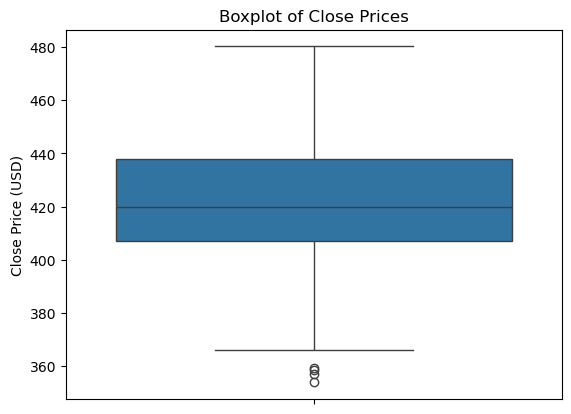

In [6]:
plt.style.use('default')
sns.boxplot(df['Close'])
plt.title("Boxplot of Close Prices")
plt.ylabel('Close Price (USD)')
plt.show()

In [7]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

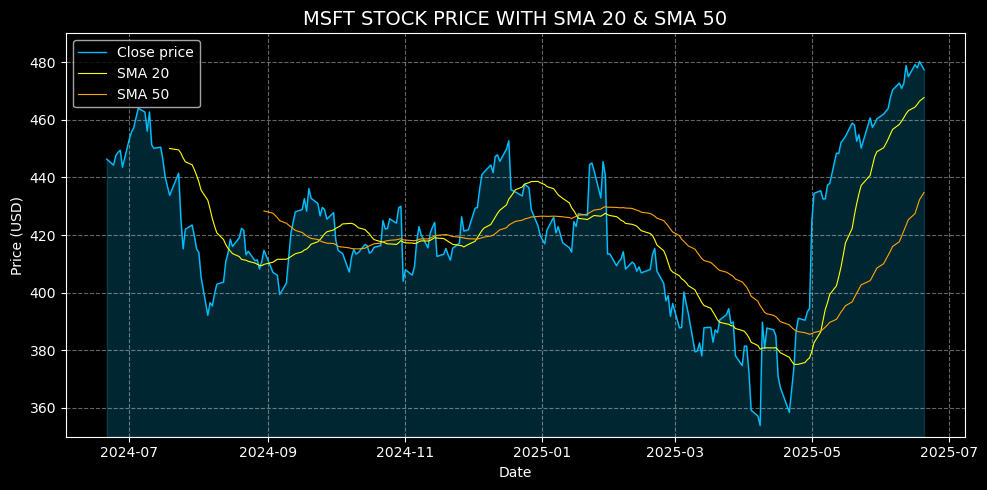

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label = 'Close price', color = 'deepskyblue', linewidth = 1.0)
plt.fill_between(df['Date'],df['Close'], 350, color = 'deepskyblue', alpha = 0.2)
plt.ylim(350, 490)
plt.plot(df['Date'], df['SMA20'], label = 'SMA 20', color = 'yellow', linewidth = 0.8)
plt.plot(df['Date'], df['SMA50'], label = 'SMA 50', color = 'orange', linewidth = 0.8)
plt.title('MSFT STOCK PRICE WITH SMA 20 & SMA 50', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha = 0.4)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [10]:
import plotly.graph_objects as go
chart = go.Figure()
chart.add_trace(go.Candlestick(
    x = df['Date'],
    open = df['Open'], high = df['High'], low = df['Low'], close = df['Close'],
    name = 'Candlestick',
    increasing_line_color = 'green', decreasing_line_color='red', increasing_line_width = 1.5, decreasing_line_width=1.0,
    increasing_fillcolor = 'green', decreasing_fillcolor = 'red'
))
chart.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], line=dict(color='yellow', width = 0.5), name='SMA 20'))
chart.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], line=dict(color='orange', width = 0.5), name='SMA 50'))
chart.add_trace(go.Scatter(x=df['Date'], y=df['EMA20'], line=dict(color='lightskyblue', width = 0.5), name='EMA 20'))
chart.update_layout(
    title = 'MSFT Candlestick chart with SMA & EMA',
    xaxis_title = 'Date', yaxis_title = 'Price (USD)',
    xaxis_rangeslider_visible = False,
    width = 1500, height=550, template = 'plotly_dark',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
chart.update_xaxes(
    dtick="M1", 
    tickformat="%b\n%Y",
    showgrid=True
)


In [11]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
chart_studio.tools.set_credentials_file(username='thaoanhlehoang', api_key='EfDO8kIAXVvK9YnYVoeU')
py.plot(chart, filename='candlestick_plot', auto_open=True)


'https://chart-studio.plotly.com/~thaoanhlehoang/1/'

In [12]:
chart.write_html("candlestick_plot.html")

In [13]:
def calculate_rsi(data, period=14):
    """
    Calculates the Relative Strength Index (RSI).

    """
    change = data.diff()
    
    gain = change.where(change > 0, 0)
    loss = -change.where(change < 0, 0) 

    avg_gain = gain.ewm(span=14, adjust=False).mean()
    avg_loss = loss.ewm(span=14, adjust=False).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_14 = calculate_rsi(df['Close'])
df['RSI (14)'] = rsi_14

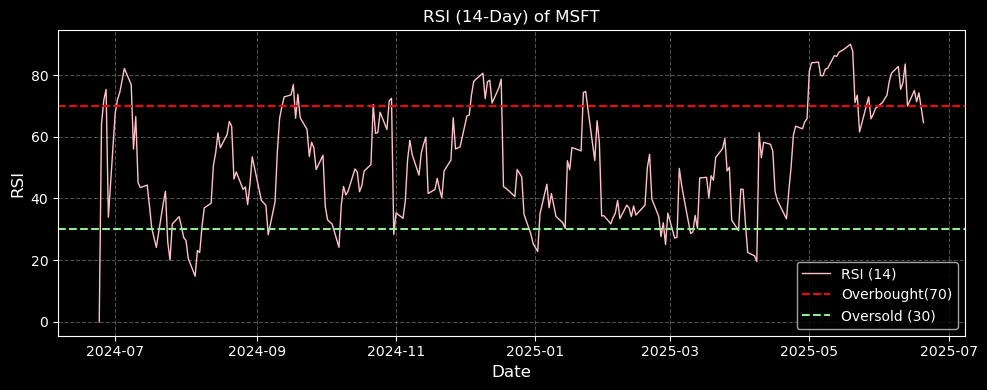

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['RSI (14)'], label = 'RSI (14)', color = 'pink', linewidth = 1.0)
plt.axhline(70, color = 'red', linestyle = '--', label = 'Overbought(70)')
plt.axhline(30, color = 'lightgreen', linestyle = '--', label = 'Oversold (30)')
plt.title('RSI (14-Day) of MSFT')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('RSI', fontsize = 12)
plt.legend()
plt.grid(True, alpha =0.3, linestyle = '--')
plt.tight_layout()
plt.show()


In [15]:
df['Daily Return'] = df['Close'].pct_change()

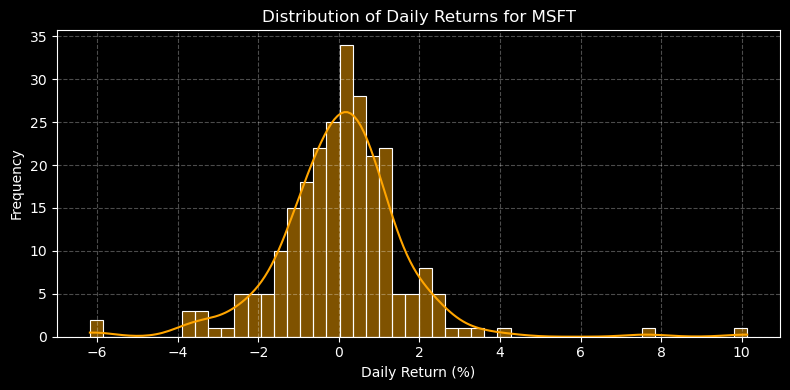

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['Daily Return']*100, bins=50, kde = True, color='orange')
plt.title("Distribution of Daily Returns for MSFT")
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.tight_layout()
plt.show()

In [17]:
print(df['Daily Return'].mean())
print(df['Daily Return'].std())

0.00039782452731762643
0.016081017300259043


In [18]:
df.to_csv('msft_stock_data.csv')

In [19]:
df.set_index('Date', inplace=True)

In [20]:
monthly_volatility = df['Daily Return'].resample('M').std()
monthly_volatility

C:\Users\LE HOANG THAO ANH\AppData\Local\Temp\ipykernel_15248\739066317.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Date
2024-06-30 00:00:00-04:00    0.007863
2024-07-31 00:00:00-04:00    0.014703
2024-08-31 00:00:00-04:00    0.012256
2024-09-30 00:00:00-04:00    0.011563
2024-10-31 00:00:00-04:00    0.015659
2024-11-30 00:00:00-05:00    0.011737
2024-12-31 00:00:00-05:00    0.012478
2025-01-31 00:00:00-05:00    0.021088
2025-02-28 00:00:00-05:00    0.009875
2025-03-31 00:00:00-04:00    0.016071
2025-04-30 00:00:00-04:00    0.029639
2025-05-31 00:00:00-04:00    0.018706
2025-06-30 00:00:00-04:00    0.005945
Freq: ME, Name: Daily Return, dtype: float64

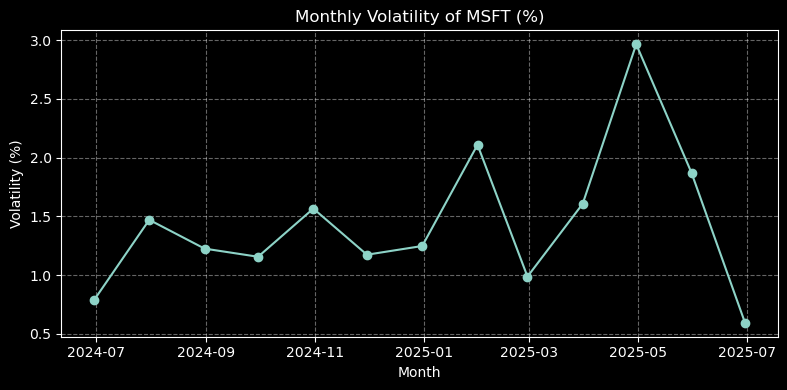

In [21]:
plt.figure(figsize=(8,4))
plt.plot(monthly_volatility.index, monthly_volatility*100, marker = 'o')
plt.title('Monthly Volatility of MSFT (%)')
plt.xlabel('Month')
plt.ylabel('Volatility (%)')
plt.grid(True, alpha = 0.4, linestyle = '--')
plt.tight_layout()
plt.show()

In [22]:
cols = ['Close', 'SMA20', 'SMA50', 'EMA20', 'RSI (14)']
correlation_matrix = df[cols].corr()
correlation_matrix

,Close,SMA20,SMA50,EMA20,RSI (14)
Close,1.000000,0.758894,0.278583,0.851181,0.628709
SMA20,0.758894,1.000000,0.671327,0.985003,0.070040
SMA50,0.278583,0.671327,1.000000,0.632712,-0.281673
EMA20,0.851181,0.985003,0.632712,1.000000,0.168566
RSI (14),0.628709,0.070040,-0.281673,0.168566,1.000000


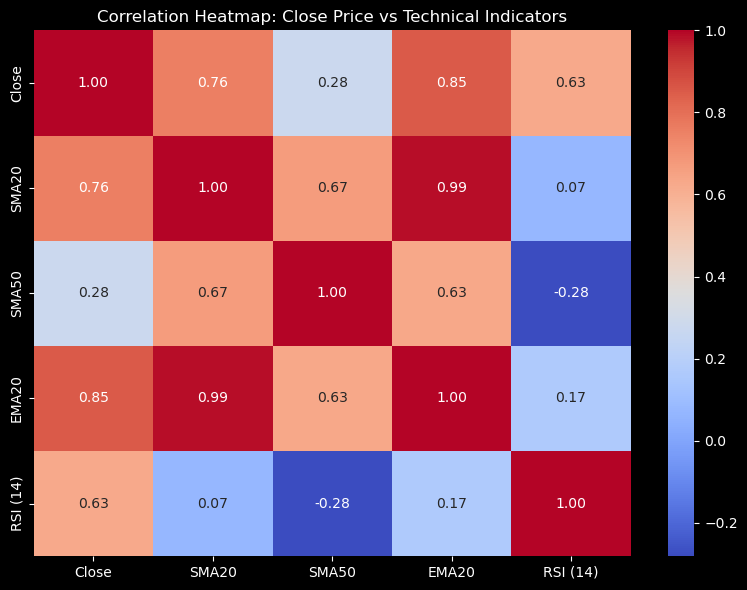

In [23]:
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap: Close Price vs Technical Indicators')
plt.tight_layout()
plt.show()